In [2]:
from IPython.display import HTML

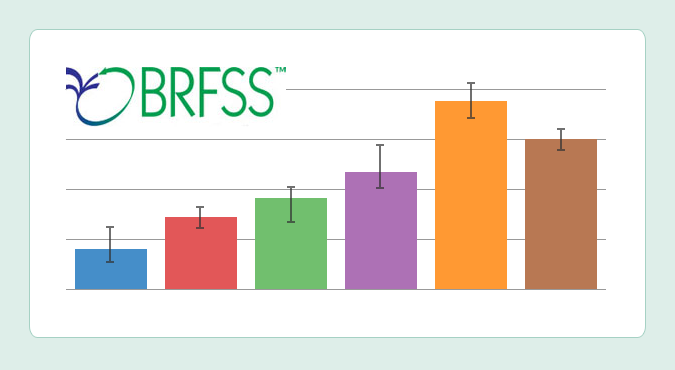

In [3]:
from IPython.display import Image
Image('WCMS_home_image.png')


Portfolio Project: Survey Data Analysis Using Python
===================

**By: Pieter Leffers**,

*Starting Date: May 1, 2018*

*Completion Date: ---, 2018*

*Last Updated: -----, 2018*

Project Description
-----------------

Data Source:
-----------
In 1984, the Centers for Disease Control and Prevention (CDC) initiated the state-based Behavioral Risk Factor Surveillance System (BRFSS)–a cross-sectional telephone survey that state health departments conduct monthly over landline telephones and cellular telephones with a standardized questionnaire and technical and methodologic assistance from CDC. BRFSS is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. Respondent data are forwarded to CDC to be aggregated for each state, returned with standard tabulations, and published at year’s end by each state. In 2011, more than 500,000 interviews were conducted in the states, the District of Columbia, and participating U.S. territories and other geographic areas.

The 2016 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2016 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 486,303 records for 2016. The November update includes recoding of responses for a variable (LASTDEN3) in California’s data and a calculated variable (_RFPAP33) set to missing in eight states which did not ask a question (HADHYST2) correctly for eight months. More information on participation is available in the states conducting surveillance, by year table. The data files are provided in ASCII and SAS Transport formats.

**Source:**

In [4]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
from pandas.core import datetools
import statsmodels.stats.weightstats as smf

In [7]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/BRFSS/data/'
BRFSS2016=pd.read_csv(location+'2016/BRFSS2016.csv',low_memory=False)

In [8]:
BRFSS2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486303 entries, 0 to 486302
Columns: 276 entries, _STATE to sleeptime
dtypes: float64(226), int64(49), object(1)
memory usage: 1.0+ GB


In [9]:
BRFSS2016.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3,sleeptime
count,486303.000000,486303.000000,4.863030e+05,486303.000000,486303.000000,486303.000000,486303.000000,4.863030e+05,4.863030e+05,253013.0,...,102386.000000,151855.000000,234791.000000,230141.000000,234791.000000,111013.000000,213798.000000,231156.000000,453321.000000,486303.000000
mean,28.973366,6.756479,6.886909e+06,6.738184,14.670964,2016.028758,1113.388978,2.016007e+09,2.016007e+09,1.0,...,1.197693,2.130684,1.904264,1.326513,1.830803,1.975039,1.996010,1.289463,1.975375,0.778465
std,15.959411,3.342713,3.371982e+06,3.370312,8.325667,0.167125,34.053420,6.915870e+03,6.915870e+03,0.0,...,0.398261,2.067062,0.294230,0.468938,0.374927,0.156007,0.063038,0.453514,1.493921,1.009916
min,1.000000,1.000000,1.012017e+06,1.000000,1.000000,2016.000000,1100.000000,2.016000e+09,2.016000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15.000000,4.000000,4.112016e+06,4.000000,8.000000,2016.000000,1100.000000,2.016002e+09,2.016002e+09,1.0,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,27.000000,7.000000,7.112016e+06,7.000000,14.000000,2016.000000,1100.000000,2.016005e+09,2.016005e+09,1.0,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,40.000000,10.000000,1.004202e+07,10.000000,21.000000,2016.000000,1100.000000,2.016009e+09,2.016009e+09,1.0,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,78.000000,12.000000,1.231202e+07,12.000000,31.000000,2017.000000,1200.000000,2.016037e+09,2.016037e+09,1.0,...,2.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,9.000000


Weighting Variable

In [10]:
WeightVar=BRFSS2016['_LLCPWT']
WeightVar.head()

0     767.844566
1     329.659884
2     290.749306
3     211.039206
4    1582.539830
Name: _LLCPWT, dtype: float64

Clustering Variable

In [11]:
ClusterVar=BRFSS2016['_PSU']
ClusterVar.head()

0    2016000001
1    2016000002
2    2016000003
3    2016000004
4    2016000005
Name: _PSU, dtype: int64

Stratum

In [12]:
StrataVar=BRFSS2016['_STSTR']
StrataVar.head()

0    11011
1    11011
2    11011
3    11011
4    11011
Name: _STSTR, dtype: int64

Using Statsmodels I was able to mostly reproduce the results from SAS code, but unfortunately I was unable to properly reproduce the Standard Errors.

**Sleep**

In [65]:
#np.dtype(BRFSS2016['sleeptime'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['sleeptime'])
#one-hot encoding
for x in temp.sleeptime.unique():
    temp[x]=(temp.sleeptime==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'sleeptime':'sleepTime', 0:'zero', 1:'one', 9:'nine'}, inplace=True)   

In [66]:
 #Setup Statsmodels to get Frequency Weights
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([zero,one,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
zeroth,first,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={zeroth: '<= 6 hrs of sleep',first: '+ 6 hrs of sleep',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('Self-Reported: Average number of hours of sleep in a 24-hour period.')
freq_table

Self-Reported: Average number of hours of sleep in a 24-hour period.


,Percent,Frequency,Weight_freq
<= 6 hrs of sleep,34.294376,153525.0,8.715955e+07
+ 6 hrs of sleep,64.680450,327054.0,1.643861e+08
Not Sure/Refused,1.025174,5724.0,2.605491e+06
Total,100.000000,486303.0,2.541511e+08


In [170]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:2]['index'],
               y=graphData.loc[0:2]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color='rgb(158,202,225)',line=dict(color='rgb(8,48,107)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
    title='<b>Self-Reported:</b><br>Average number of hours of sleep in a 24-hour period.',
    yaxis=dict(title='<b>Sleep (%)</b>',ticks='',showticklabels=False,showgrid=False,
    titlefont=dict(family='Arial, sans-serif',size=15,color='444444',)),xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Plot Explanation:** Approximately 34 percent of adults in the United States report getting 6 hours or less sleep per night.

**Physical Activity**

In [ ]:
#np.dtype(BRFSS2016['_TOTINDA'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_TOTINDA'])
#one-hot encoding
for x in temp._TOTINDA.unique():
    temp[x]=(temp._TOTINDA==x).astype(int)
#temp.columns
#Index(['sleeptime', 0, 1, 9], dtype='object')
temp.rename(columns={'_TOTINDA':'physActive', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [54]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'Had physical activity or exercise.',second: 'No physical activity or exercise.',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.')
freq_table

CDC Calculated Variable: Adults who reported doing physical activity or exercise during the past 30 days.


,Percent,Frequency,Weight_freq
Had physical activity or exercise.,75.481018,361649.0,1.918359e+08
No physical activity or exercise.,24.383464,123860.0,6.197085e+07
Not Sure/Refused,0.135519,794.0,3.444223e+05
Total,100.000000,486303.0,2.541511e+08


**Children**

In [1516]:
#np.dtype(BRFSS2016['_CHLDCNT'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_CHLDCNT'])
#one-hot encoding
for x in temp._CHLDCNT.unique():
    temp[x]=(temp._CHLDCNT==x).astype(int)

#temp.columns
#Index(['_CHLDCNT', 4, 1, 2, 5, 3, 9, 6], dtype='object')
temp.rename(columns={'_CHLDCNT':'ChildCount', 4:'four', 1:'one', 2:'two', 5:'five',3:'three',9:'nine',6:'six'}, inplace=True)

In [1517]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,fifth,sixth,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4],freq_table.index[5],freq_table.index[6]
freq_table.rename(index={first: 'One child',second: 'Two children',third: 'Three children',fourth:'Four children',fifth:'Five children',sixth:'Six children',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={7:'Total'},inplace=True)
print('Self-Reported: Number of children in the household.')
freq_table

Self-Reported: Number of children in the household.


,Percent,Frequency,Weight_freq
One child,63.119989,359007.0,1.604202e+08
Two children,14.625321,51115.0,3.717042e+07
Three children,12.571689,43194.0,3.195109e+07
Four children,5.454542,18358.0,1.386278e+07
Five children,1.947746,6735.0,4.950218e+06
Six children,0.978397,3472.0,2.486606e+06
Not Sure/Refused,1.302316,4422.0,3.309852e+06
Total,100.000000,486303.0,2.541511e+08


**Age Groupings**

In [1518]:
#BRFSS2016['_AGEG5YR'].unique()
#array([ 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype=int64)

#np.dtype(BRFSS2016['_AGEG5YR'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_AGEG5YR'])
#one-hot encoding
for x in temp._AGEG5YR.unique():
    temp[x]=(temp._AGEG5YR==x).astype(int)
    
#temp.columns
#Index(['_AGEG5YR', 5,  8, 13, 11,  1, 10, 12,  9,  7,  4,  3,  2,  6, 14], dtype='object')
temp.rename(columns={'_AGEG5YR':'AgeGroupings', 5:'five', 8:'eight', 13:'thirteen', 11:'eleven',1:'one',10:'ten',12:'twelve',9:'nine',7:'seven',4:'four',3:'three',2:'two',6:'six',14:'fourteen'}, inplace=True)

In [1519]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#five
freqTemp = smf.DescrStatsW(temp['five'], weights=WeightVar)
counts=np.array(pd.Series(temp.five).value_counts())
five=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#six
freqTemp = smf.DescrStatsW(temp['six'], weights=WeightVar)
counts=np.array(pd.Series(temp.six).value_counts())
six=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eight
freqTemp = smf.DescrStatsW(temp['eight'], weights=WeightVar)
counts=np.array(pd.Series(temp.eight).value_counts())
eight=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#ten
freqTemp = smf.DescrStatsW(temp['ten'], weights=WeightVar)
counts=np.array(pd.Series(temp.ten).value_counts())
ten=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#eleven
freqTemp = smf.DescrStatsW(temp['eleven'], weights=WeightVar)
counts=np.array(pd.Series(temp.eleven).value_counts())
eleven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#twelve
freqTemp = smf.DescrStatsW(temp['twelve'], weights=WeightVar)
counts=np.array(pd.Series(temp.twelve).value_counts())
twelve=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#thirteen
freqTemp = smf.DescrStatsW(temp['thirteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.thirteen).value_counts())
thirteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#fourteen
freqTemp = smf.DescrStatsW(temp['fourteen'], weights=WeightVar)
counts=np.array(pd.Series(temp.fourteen).value_counts())
fourteen=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,five,six,seven,eight,\
nine,ten,eleven,twelve,thirteen,fourteen]),columns=['Percent','Frequency','Weight_freq'])

#Modify index rows
first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelfth,thirteenth,fourteenth = \
freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],\
freq_table.index[4],freq_table.index[5],freq_table.index[6],freq_table.index[7],\
freq_table.index[8],freq_table.index[9],freq_table.index[10],\
freq_table.index[11],freq_table.index[12],freq_table.index[13]
freq_table.rename(index={first: '18-24',second: '25-29',third: '30-34',fourth:'35-39',fifth:'40-44',sixth:'45-49',seventh:'50-54',eighth:'55-59',ninth:'60-64',tenth:'65-69',eleventh:'70-74',twelfth:'75-79',thirteenth:'80+',fourteenth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={14:'Total'},inplace=True)
print('Self-Reported: Age in five-year age categores.')
freq_table

Self-Reported: Age in five-year age categores.


,Percent,Frequency,Weight_freq
18-24,12.658092,459677.0,3.217068e+07
25-29,8.213207,23034.0,2.087396e+07
30-34,9.135461,25432.0,2.321788e+07
35-39,8.108885,27192.0,2.060882e+07
40-44,7.945350,27195.0,2.019320e+07
45-49,7.412601,33014.0,1.883921e+07
50-54,9.013114,41810.0,2.290693e+07
55-59,8.084989,49799.0,2.054809e+07
60-64,8.292014,54770.0,2.107425e+07
65-69,6.617331,55831.0,1.681802e+07


**Mental Health**

In [1520]:
#np.dtype(BRFSS2016['_MENT14D'])
#dtype('int64')
temp=pd.DataFrame(BRFSS2016['_MENT14D'])
#one-hot encoding
for x in temp._MENT14D.unique():
    temp[x]=(temp._MENT14D==x).astype(int)

#temp.columns
#Index(['_MENT14D', 1, 2, 3, 9], dtype='object')
temp.rename(columns={'_MENT14D':'MentHealth', 1:'one', 2:'two', 3:'three', 9:'nine'}, inplace=True)

In [1521]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3]
freq_table.rename(index={first: '0 Days',second: '1-13 Days',third: '14+ Days',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={4:'Total'},inplace=True)
print('CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.')
freq_table

CDC Calculated Variable: Number of days mental health was not good in the last 30 Days.


,Percent,Frequency,Weight_freq
0 Days,64.735937,329500.0,1.645271e+08
1-13 Days,22.196703,97942.0,5.641317e+07
14+ Days,11.485141,50906.0,2.918962e+07
Not Sure/Refused,1.582219,7955.0,4.021228e+06
Total,100.000000,486303.0,2.541511e+08


**Alcohol**

In [1508]:
temp=pd.DataFrame(BRFSS2016['_RFBING5'])
#one-hot encoding
for x in temp._RFBING5.unique():
    temp[x]=(temp._RFBING5==x).astype(int)

#temp.columns
#Index(['_RFBING5', 1, 2, 9], dtype='object')
temp.rename(columns={'_MENT14D':'BingDrink', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [1509]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for binge drinkers.')
freq_table

CDC Calculated Variable: Calculated variable for binge drinkers.


,Percent,Frequency,Weight_freq
No,76.975496,397997.0,1.956341e+08
Yes,15.616374,59205.0,3.968919e+07
Not Sure/Refused,7.408130,29101.0,1.882785e+07
Total,100.000000,486303.0,2.541511e+08


**Smoking**

In [1510]:
temp=pd.DataFrame(BRFSS2016['_RFSMOK3'])
#one-hot encoding
for x in temp._RFSMOK3.unique():
    temp[x]=(temp._RFSMOK3==x).astype(int)

#temp.columns
#Index(['_RFSMOK3', 1, 2, 9], dtype='object')
temp.rename(columns={'_RFSMOK3':'TOBUSER', 1:'one', 2:'two', 9:'nine'}, inplace=True)

In [1511]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,nine]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,ninth = freq_table.index[0],freq_table.index[1],freq_table.index[2]
freq_table.rename(index={first: 'No',second: 'Yes',ninth:'Not Sure/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={3:'Total'},inplace=True)
print('CDC Calculated Variable: Calculated variable for current tobacco use.')
freq_table

CDC Calculated Variable: Calculated variable for current tobacco use.


,Percent,Frequency,Weight_freq
No,79.403604,397533.0,2.018052e+08
Yes,15.473551,68942.0,3.932621e+07
Not Sure/Refused,5.122845,19828.0,1.301977e+07
Total,100.000000,486303.0,2.541511e+08


**Weight (BMI)**

In [1512]:
temp=pd.DataFrame(BRFSS2016['_BMI5CAT'])
#replace null values
temp.fillna(0,inplace=True)
#one-hot encoding
for x in temp._BMI5CAT.unique():
    temp[x]=(temp._BMI5CAT==x).astype(int)

#temp.columns
temp.rename(columns={'_BMI5CAT':'BMICATS', 1:'one', 2:'two', 3:'three',4:'four',0:'zero'}, inplace=True)

In [1513]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#three
freqTemp = smf.DescrStatsW(temp['three'], weights=WeightVar)
counts=np.array(pd.Series(temp.three).value_counts())
three=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])
#four
freqTemp = smf.DescrStatsW(temp['four'], weights=WeightVar)
counts=np.array(pd.Series(temp.four).value_counts())
four=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#zero
freqTemp = smf.DescrStatsW(temp['zero'], weights=WeightVar)
counts=np.array(pd.Series(temp.zero).value_counts())
zero=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,three,four,zero]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,third,fourth,zero = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Underweight',second: 'Normal',third:'Overweight',fourth:'Obese',zero:'Missing/Refused'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
#freq_table.loc[len(freq_table)]=last
#freq_table.rename(index={5:'Total'},inplace=True)
print('CDC Calculated Variable: Computed body mass index categories.')
freq_table

CDC Calculated Variable: Computed body mass index categories.


,Percent,Frequency,Weight_freq
Underweight,1.801475,478773.0,4.578469e+06
Normal,30.209211,142110.0,7.677705e+07
Overweight,32.063758,325021.0,8.149041e+07
Obese,26.910368,135765.0,6.839300e+07
Missing/Refused,9.015188,39616.0,2.291220e+07


Crosstabs 
------------------------
**2x2 Chi-Square Contingency Tables**

Modeling
-----------